In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [24]:
Dataset = pd.read_csv(r"E:\Projects\Anomaly Detection\Dataset\Normalized\ZScoreDataset.csv")

In [ ]:
Dataset

In [5]:
Dataset['Category'].unique().tolist()

['BENIGN',
 'DDoS',
 'PortScan',
 'Bot',
 'Infiltration',
 'Web Brute Force',
 'Web XSS',
 'Web Sql Injection',
 'FTP-Patator',
 'SSH-Patator',
 'DoS slowloris',
 'DoS Slowhttptest',
 'DoS Hulk',
 'DoS GoldenEye',
 'Heartbleed']

In [25]:
OldNames = ['BENIGN',
 'DDoS',
 'PortScan',
 'Bot',
 'Infiltration',
 'Web Attack � Brute Force',
 'Web Attack � XSS',
 'Web Attack � Sql Injection',
 'FTP-Patator',
 'SSH-Patator',
 'DoS slowloris',
 'DoS Slowhttptest',
 'DoS Hulk',
 'DoS GoldenEye',
 'Heartbleed']

NewNames = ['BENIGN',
 'DDoS',
 'PortScan',
 'Bot',
 'Infiltration',
 'Web Brute Force',
 'Web XSS',
 'Web Sql Injection',
 'FTP-Patator',
 'SSH-Patator',
 'DoS slowloris',
 'DoS Slowhttptest',
 'DoS Hulk',
 'DoS GoldenEye',
 'Heartbleed']

Categories =[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

In [26]:
Dataset['Category'].replace(OldNames, Categories, inplace=True)

C:\Users\ultrq\AppData\Local\Temp\ipykernel_17432\1834079773.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['Category'].replace(OldNames, Categories, inplace=True)
C:\Users\ultrq\AppData\Local\Temp\ipykernel_17432\1834079773.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Dataset['C

In [28]:
Dataset.to_csv(r"E:\Projects\Anomaly Detection\Dataset\Normalized\ZScoreDataset-V-2.csv",index=False)

In [19]:
print(len(Dataset.columns.tolist()))

80


In [27]:
Dataset['Category'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [12]:
Dataset['Category'].replace('Web Sql Injection', 8, inplace=True)

C:\Users\ultrq\AppData\Local\Temp\ipykernel_17432\3110338584.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Dataset['Category'].replace('Web Sql Injection', 8, inplace=True)


In [16]:
Dataset['Category'].value_counts()

Category
0     2096484
12     172849
1      128016
2       90819
13      10286
8        5933
10       5385
11       5228
9        3219
3        1953
Name: count, dtype: int64

In [15]:
Num = [5,6,4,7,14]
for index, row in Dataset.iterrows():
    value = row['Category']
    if value in Num:
        Dataset.drop(index, inplace=True)
       
    

In [ ]:
Dataset.drop(1180539)

In [39]:
Matrix = Dataset.corr()

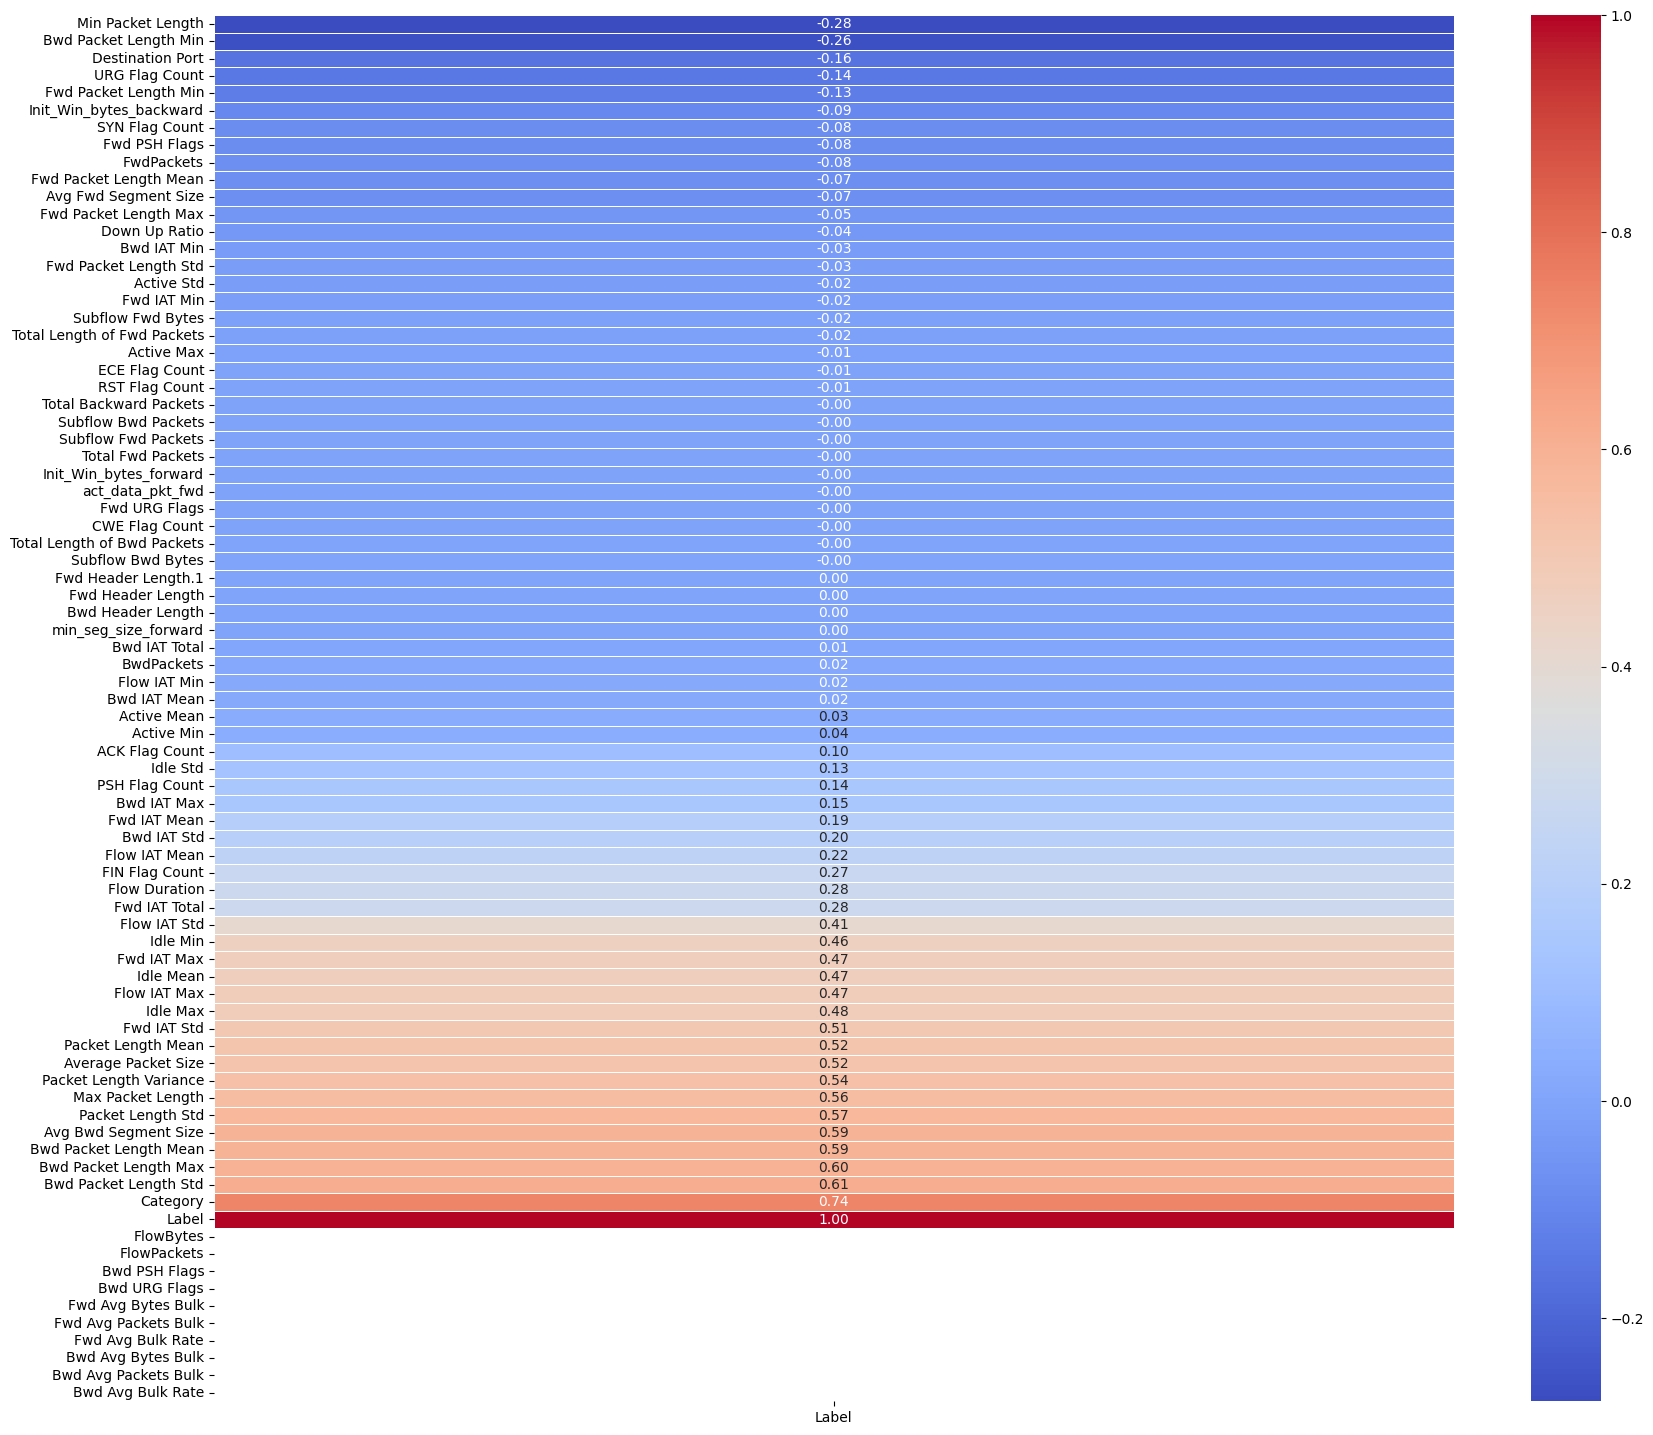

In [67]:
plt.figure(figsize=(20,18))
sns.heatmap(LabelMatrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [ ]:
print(Matrix.head())

In [ ]:
LabelMatrix = Matrix.loc[:, Matrix.columns.isin(['Label'])]

print(LabelMatrix.head())

In [66]:
LabelMatrix.sort_values('Label', inplace=True)

C:\Users\ultrq\AppData\Local\Temp\ipykernel_17432\2113833560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LabelMatrix.sort_values('Label', inplace=True)


In [70]:
LabelMatrix.to_csv(r"E:\Projects\Anomaly Detection\Dataset\Label Correlation Matrix.csv")

In [98]:
HighCorrelationList = []

for index, row in LabelMatrix.iterrows():
    if row['Label'] > 0.1:
        HighCorrelationList.append(index)
    elif row['Label'] < -0.1:
        HighCorrelationList.append(index)

print(len(HighCorrelationList))
print(HighCorrelationList)

33
['Min Packet Length', 'Bwd Packet Length Min', 'Destination Port', 'URG Flag Count', 'Fwd Packet Length Min', 'ACK Flag Count', 'Idle Std', 'PSH Flag Count', 'Bwd IAT Max', 'Fwd IAT Mean', 'Bwd IAT Std', 'Flow IAT Mean', 'FIN Flag Count', 'Flow Duration', 'Fwd IAT Total', 'Flow IAT Std', 'Idle Min', 'Fwd IAT Max', 'Idle Mean', 'Flow IAT Max', 'Idle Max', 'Fwd IAT Std', 'Packet Length Mean', 'Average Packet Size', 'Packet Length Variance', 'Max Packet Length', 'Packet Length Std', 'Avg Bwd Segment Size', 'Bwd Packet Length Mean', 'Bwd Packet Length Max', 'Bwd Packet Length Std', 'Category', 'Label']


In [99]:
HighcorrelationDataset = Dataset.loc[:, Dataset.columns.isin(HighCorrelationList)]

In [101]:
HighcorrelationDataset.columns

Index(['Destination Port', 'Flow Duration', 'Fwd Packet Length Min',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Total', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Max', 'Bwd IAT Std', 'Bwd IAT Max',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
       'Average Packet Size', 'Avg Bwd Segment Size', 'Idle Mean', 'Idle Std',
       'Idle Max', 'Idle Min', 'Category', 'Label'],
      dtype='object')

In [26]:
Dataset.to_csv(r"E:\Projects\Anomaly Detection\Dataset\HighCorrelationDataset-V-2.csv", index=False)

In [27]:
len(Dataset.columns)

33

In [23]:
Dataset.head()

,Destination Port,Flow Duration,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,...,ACK Flag Count,URG Flag Count,Average Packet Size,Avg Bwd Segment Size,Idle Mean,Idle Std,Idle Max,Idle Min,Category,Label
0,2.426285,-0.470736,-0.217037,-0.478134,-0.608643,-0.538268,-0.427223,-0.308688,-0.387499,-0.400842,...,1.484319,-0.335971,-0.588566,-0.538268,-0.375644,-0.116044,-0.381002,-0.361637,0,0
1,2.436219,-0.470733,-0.217037,-0.475190,-0.523981,-0.528780,-0.427223,-0.308666,-0.387499,-0.400838,...,1.484319,2.976449,-0.588566,-0.528780,-0.375644,-0.116044,-0.381002,-0.361637,0,0
2,2.436272,-0.470734,-0.217037,-0.475190,-0.523981,-0.528780,-0.427223,-0.308678,-0.387499,-0.400840,...,1.484319,2.976449,-0.588566,-0.528780,-0.375644,-0.116044,-0.381002,-0.361637,0,0
3,1.972726,-0.470735,-0.217037,-0.475190,-0.523981,-0.528780,-0.427223,-0.308682,-0.387499,-0.400841,...,1.484319,2.976449,-0.588566,-0.528780,-0.375644,-0.116044,-0.381002,-0.361637,0,0
4,2.426180,-0.470736,-0.217037,-0.478134,-0.608643,-0.538268,-0.427223,-0.308688,-0.387499,-0.400842,...,1.484319,-0.335971,-0.588566,-0.538268,-0.375644,-0.116044,-0.381002,-0.361637,0,0


In [ ]:
Dataset = pd.read_csv(r"E:\Projects\Anomaly Detection\Dataset\HighCorrelationDataset.csv")

In [ ]:
List =[]
List = Dataset['Category'].unique()

(Dataset['Category'] in List).sum()

In [ ]:
Dict ={}
for i in Dataset['Category']:
    if i not in Dict.items():
            Dict[i] = 1
    for k, v in Dict.items():
        print(k, i)
        if k == i:
                print("If")
                v += 1
                Dict[k] = v
print(Dict)

In [19]:
Dataset.drop('Unnamed: 0',axis='columns',inplace=True)

In [20]:
Dataset.columns

Index(['Destination Port', 'Flow Duration', 'Fwd Packet Length Min',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Total', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Max', 'Bwd IAT Std', 'Bwd IAT Max',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
       'Average Packet Size', 'Avg Bwd Segment Size', 'Idle Mean', 'Idle Std',
       'Idle Max', 'Idle Min', 'Category', 'Label'],
      dtype='object')

In [ ]:
Dataset.drop_duplicates()